In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!pwd

/Users/shivagarg/OneDrive - Guavus Network Systems Pvt. Ltd/Downloads_Backup/JANTA HACKATHON


In [3]:
train = pd.read_csv("/Users/shivagarg/OneDrive - Guavus Network Systems Pvt. Ltd/Downloads_Backup/JANTA HACKATHON/train_E52nqFa/train.csv")

In [4]:
train.columns

Index(['review_id', 'title', 'year', 'user_review', 'user_suggestion'], dtype='object')

In [5]:
train_ids = list(train['review_id'].unique())
train_labels = train['user_suggestion']

In [6]:
test = pd.read_csv("/Users/shivagarg/OneDrive - Guavus Network Systems Pvt. Ltd/Downloads_Backup/JANTA HACKATHON/test.csv")

In [7]:
train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [8]:
train.groupby('title').agg({'user_suggestion':'mean'}).reset_index().rename(columns={'user_suggestion':'event_rate'}).sort_values(by='event_rate',ascending=False)

,title,event_rate
14,EverQuest II,0.971014
16,Fractured Space,0.958217
21,Path of Exile,0.906114
6,Creativerse,0.900407
22,PlanetSide 2,0.896186
34,Tactical Monsters Rumble Arena,0.894737
33,Spooky's Jump Scare Mansion,0.886740
27,Ring of Elysium,0.875895
4,Brawlhalla,0.865854
32,Shop Heroes,0.865385


In [9]:
test.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [10]:
test_sample = test.copy()

In [11]:
test_sample['user_suggestion'] = list(map(lambda x: 1 if x not in ['Infestation: The New Z','Bless Online','War Thunder','Heroes & General','Robocraft'] else 0, test_sample['title']))

In [12]:
test_sample['user_suggestion'].value_counts()

1    8045
Name: user_suggestion, dtype: int64

In [13]:
test_sample[['review_id','user_suggestion']].to_csv("sample_submission_v1.csv",index=False)

In [14]:
train_games = list(train['title'].unique())
test_games = list(test['title'].unique())

In [15]:
common_games = [x for x in test_games if x in train_games]

In [16]:
common_games

[]

No common games in the test dataset

In [17]:
test['review_id'].min(),test['review_id'].max(),train['review_id'].min(),train['review_id'].max()

(1603, 25202, 1, 25539)

In [18]:
test_ids = list(test['review_id'].unique())

In [19]:
combined_data = pd.concat([train[['review_id', 'title', 'year', 'user_review']], test])

In [20]:
combined_data.shape

(25539, 4)

In [21]:
combined_data.head()

,review_id,title,year,user_review
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu..."
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn..."
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si..."
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...


In [22]:
game_overview = pd.read_csv("/Users/shivagarg/OneDrive - Guavus Network Systems Pvt. Ltd/Downloads_Backup/JANTA HACKATHON/train_E52nqFa/game_overview.csv")

In [23]:
combined_data2 = pd.merge(combined_data,game_overview,on="title",how="left")

In [24]:
combined_data2.columns

Index(['review_id', 'title', 'year', 'user_review', 'developer', 'publisher',
       'tags', 'overview'],
      dtype='object')

In [25]:
for col in [ 'title','user_review', 'developer', 'publisher', 'overview']:
    combined_data2[col] = combined_data2[col].str.strip().str.lower()

In [26]:
train1 = pd.get_dummies(combined_data2, columns = ['publisher','title','developer'])

In [27]:
train1 = train1.iloc[:,5:].copy()

In [28]:
train1.head()

,publisher_8floor,publisher_aeria games,"publisher_artix entertainment, llc",publisher_betadwarf,publisher_bethesda softworks,publisher_camex games,"publisher_cloudcade, inc.",publisher_codename entertainment inc.,"publisher_cygames, inc., cygames korea inc.",publisher_daybreak game company,...,developer_trendy entertainment,developer_trion worlds,"developer_valkyrie entertainment, llc",developer_valve,"developer_valve, hidden path entertainment",developer_wargaming group limited,developer_warteam,"developer_wild shadow studios, deca games",developer_winged cloud,developer_x-legend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
combined_data2["tags2"] = list(map(lambda x: re.sub("'","",x[1:-1].strip().lower()).split(",") , combined_data2["tags"]))

tag_list = []
for i in range(len(combined_data2)):
    tag_list += combined_data2['tags2'].iloc[i]
    

tag_list = list(set([x.strip() for x in tag_list]))

for item in tag_list:
    combined_data2[item]= list(map(lambda x: 1 if item in x.lower() else 0, combined_data2['tags']))

In [30]:
combined_data2.head()

,review_id,title,year,user_review,developer,publisher,tags,overview,tags2,moba,...,fast-paced,visual novel,world war ii,e-sports,singleplayer,cartoony,crafting,bullet hell,clicker,top-down
0,1,spooky's jump scare mansion,2016.0,i'm scared and hearing creepy voices. so i'll...,lag studios,lag studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",can you survive 1000 rooms of cute terror? or ...,"[horror, free to play, cute, first-person, ...",0,...,0,0,0,0,1,0,0,0,0,0
1,2,spooky's jump scare mansion,2016.0,"best game, more better than sam pepper's youtu...",lag studios,lag studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",can you survive 1000 rooms of cute terror? or ...,"[horror, free to play, cute, first-person, ...",0,...,0,0,0,0,1,0,0,0,0,0
2,3,spooky's jump scare mansion,2016.0,"a littly iffy on the controls, but once you kn...",lag studios,lag studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",can you survive 1000 rooms of cute terror? or ...,"[horror, free to play, cute, first-person, ...",0,...,0,0,0,0,1,0,0,0,0,0
3,4,spooky's jump scare mansion,2015.0,"great game, fun and colorful and all that.a si...",lag studios,lag studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",can you survive 1000 rooms of cute terror? or ...,"[horror, free to play, cute, first-person, ...",0,...,0,0,0,0,1,0,0,0,0,0
4,5,spooky's jump scare mansion,2015.0,not many games have the cute tag right next to...,lag studios,lag studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",can you survive 1000 rooms of cute terror? or ...,"[horror, free to play, cute, first-person, ...",0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
train2 = combined_data2.iloc[:,9:].copy()

In [32]:
data1 = pd.merge(train1,train2,left_index=True,right_index=True,how="left")

In [33]:
data1.shape

(25539, 338)

In [34]:
combined_data2.columns

Index(['review_id', 'title', 'year', 'user_review', 'developer', 'publisher',
       'tags', 'overview', 'tags2', 'moba',
       ...
       'fast-paced', 'visual novel', 'world war ii', 'e-sports',
       'singleplayer', 'cartoony', 'crafting', 'bullet hell', 'clicker',
       'top-down'],
      dtype='object', length=170)

In [35]:
data2= pd.merge(combined_data2[['review_id', 'title', 'year', 'user_review', 'developer', 'publisher', 'overview']],data1,left_index=True,right_index=True,how="left")

In [36]:
data2.head()

,review_id,title,year,user_review,developer,publisher,overview,publisher_8floor,publisher_aeria games,"publisher_artix entertainment, llc",...,fast-paced,visual novel,world war ii,e-sports,singleplayer,cartoony,crafting,bullet hell,clicker,top-down
0,1,spooky's jump scare mansion,2016.0,i'm scared and hearing creepy voices. so i'll...,lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,spooky's jump scare mansion,2016.0,"best game, more better than sam pepper's youtu...",lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,spooky's jump scare mansion,2016.0,"a littly iffy on the controls, but once you kn...",lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,spooky's jump scare mansion,2015.0,"great game, fun and colorful and all that.a si...",lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,spooky's jump scare mansion,2015.0,not many games have the cute tag right next to...,lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
word_vect1 = TfidfVectorizer(strip_accents ='unicode', 
                            min_df=5,max_df=0.9999,
                            stop_words='english', 
                            analyzer='word', 
                            ngram_range = (1,2), 
                            sublinear_tf = True)


word_vect1.fit(data2['user_review'])
X_train_word_features1 = word_vect1.transform(data2['user_review'])

In [38]:
feature_names1 = np.array(word_vect1.get_feature_names())
print(len(word_vect1.get_feature_names()))
print('Some elements of feature names in word vectorizer are:\n{}\n'.format(feature_names1[::200]))

49352
Some elements of feature names in word vectorizer are:
['00' '100s' '1v5' '30 game' '5th time' 'ability attack' 'access content'
 'access reviewwhen' 'actual mtg' 'addicted' 'aging' 'allows build'
 'amplified' 'appealing' 'arranging' 'attack phase' 'away players'
 'bad review' 'barely scratched' 'battlefield game' 'best best'
 'better cod' 'biases' 'bla' 'boosting' 'brain dead' 'buffing' 'bummer'
 'buy stuff' 'captures' 'cards just' 'cash make' 'certainly game'
 'character die' 'cheaters hackers' 'class balancing' 'clone minecraft'
 'combat fast' 'common problem' 'competitions' 'concept fun' 'constructed'
 'controls keyboard' 'costs 50' 'crash computer' 'cs' 'cute graphics'
 'day pretty' 'decide buy' 'dedicated servers' 'depending time'
 'developers just' 'did miss' 'different just' 'disappears' 'does allow'
 'doing make' 'don try' 'downs' 'duck' 'earn money' 'educational'
 'end nasa' 'enjoyable experience' 'especially devs' 'exceeding'
 'experience dcs' 'extremely difficult' 'fa

In [39]:
sorted_tfidf_index = X_train_word_features1.max(0).toarray()[0].argsort()
print('Words with smallest tfidf:\n{}\n'.format(feature_names1[sorted_tfidf_index[:50]]))
print('Words with largest tfidf: \n{}'.format(feature_names1[sorted_tfidf_index[:-50:-1]]))

Words with smallest tfidf:
['50 damage' 'actually hard' 'grand scheme' 'player life' 'decent fast'
 'bad earrape' 'lovley' 'classes character' 'average long' 'short average'
 'fast rich' 'paint potato' 'reality beautiful' 'left recommended'
 'master difficult' 'heard minor' 'mehh starring' 'floating average'
 'eargasm' 'audio eargasm' 'eargasm good' 'run paint' 'press easy'
 'leaderboards ranks' 'rich boiiiiii' 'long paint' 'lovley ll'
 'walls better' 'good lovley' 'difficult dark' 'progress average'
 'easy significant' 'potato decent' 'gameplay mehh' 'grind care' 'reloads'
 'plant bomb' 'brings issue' 'field bosses' 'doesn reward' 'explain later'
 'tree removed' 'won matter' 'tier ii' 'need talk' 'dismissing'
 'actually pro' 'weapons shot' 'unbox' 'waypoint']

Words with largest tfidf: 
['time' 'csgo' 'liked' 'join' 'ahem' 'yeah' 'unoptimised' 'mushrooms' 'ia'
 'ehh' 'max' 'access' 'bad' 'x2' 'stone' 'medic' 'spooky' 'cs'
 'infestation' '10' 'ray' 'farm' 'pootis' 'то' 'virus' 'ck' 'fa

In [40]:
word_vect1.fit(data2['overview'])
X_train_word_features2 = word_vect1.transform(data2['overview'])

In [41]:
feature_names2 = np.array(word_vect1.get_feature_names())
print(len(word_vect1.get_feature_names()))
print('Some elements of feature names in word vectorizer are:\n{}\n'.format(feature_names2[::200]))

13561
Some elements of feature names in word vectorizer are:
['000' '3d visuals' 'according actual' 'adventures' 'animated'
 'attachments vehicles' 'bases skies' 'beloved fantasy' 'bonus quests'
 'building' 'caucasus nevada' 'choice develop' 'collecting trophies'
 'complete mini' 'cornerstones personal' 'crown' 'day speed' 'deploys'
 'disable app' 'dressed killpath' 'electrifying' 'entering player'
 'exclusive tutorials' 'fantastic treasures' 'fight infantry'
 'forests massive' 'frozen' 'gameplay descriptioneach' 'global'
 'guaranteed catches' 'helicopters wwii' 'hour'
 'improvementsadvancement systemlarge' 'introduces' 'just tip'
 'learn secrets' 'listening' 'm1907mars' 'massive clan' 'mighty 55'
 'modelsbikecaptain americaducati' 'multitude options' 'number'
 'optional content' 'patches updates'
 'pistolshotgunsremington 870mossberg' 'player survivalscavenge'
 'possibilities' 'proud present' 'racing dominate' 'rebellious freedom'
 'rewards experience' 'rush battle' 'separate free' 's

In [42]:
sorted_tfidf_index2 = X_train_word_features2.max(0).toarray()[0].argsort()
print('Words with smallest tfidf:\n{}\n'.format(feature_names2[sorted_tfidf_index2[:50]]))
print('Words with largest tfidf: \n{}'.format(feature_names2[sorted_tfidf_index2[:-50:-1]]))

Words with smallest tfidf:
['thing' 'flow' 'examples' 'engaging' 'rapid' 'guns world' 'dream'
 'real thing' 'world realistic' 'new vaquerochiappa' 'gas' 'gas block'
 'gasses' 'gasses flow' 'cm flak' 'fighting vehicle' 'struggle world'
 'struggle' 'colt saas' 'including slow'
 'cobradeloreanmilitaryinfantry fighting' 'including hardcore' 'vz 61b'
 'stripping gun' 'stripping' 'new models' 'cobradeloreanmilitaryinfantry'
 'includes modes' 'genius' 'genius tiny' 'colt' 'nagantdp 27'
 'garandthompson' 'cm' 'riflesak47sig' 'commandolr' 'mp44mg 34liberator'
 'mp9kriss' 'mp9kriss vector' 'rifles machine' 'rifleruger 1beretta'
 'rifleruger' 'riflenot' 'riflemosin nagantdp' 'riflemosin'
 'rifledreyse m1907mars' 'garandthompson gunmauser' 'rifledreyse'
 'vss vintorez' 'garands']

Words with largest tfidf: 
['smite' 'paladins' 'cs' 'poker' 'basketball' 'apocalypse' 'h1z1' 'dota'
 'deck scratch' 'scratch battle' 'draft deck' 'business' 'vault' 'wait'
 'bloons' 'dragon' 'elsword' 'digimons' 'digimon

In [43]:
data2['if_dev_ne_pub'] = list(map(lambda x,y: 1 if x!=y else 0, data2['developer'],data2['publisher']))

In [44]:
data2.head()

,review_id,title,year,user_review,developer,publisher,overview,publisher_8floor,publisher_aeria games,"publisher_artix entertainment, llc",...,visual novel,world war ii,e-sports,singleplayer,cartoony,crafting,bullet hell,clicker,top-down,if_dev_ne_pub
0,1,spooky's jump scare mansion,2016.0,i'm scared and hearing creepy voices. so i'll...,lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,spooky's jump scare mansion,2016.0,"best game, more better than sam pepper's youtu...",lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,spooky's jump scare mansion,2016.0,"a littly iffy on the controls, but once you kn...",lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,spooky's jump scare mansion,2015.0,"great game, fun and colorful and all that.a si...",lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,spooky's jump scare mansion,2015.0,not many games have the cute tag right next to...,lag studios,lag studios,can you survive 1000 rooms of cute terror? or ...,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
data2['year'] = data2['year'].fillna(0)

In [46]:
train_processed = data2[:train.shape[0]].copy()

In [47]:
test_processed = data2[-test.shape[0]:].copy()

In [48]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [49]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_processed, train_labels, test_size=0.3, random_state=1) # 70% training and 30% test

In [79]:
feature_sets = [x for x in train_processed.columns if x not in ['review_id','title','user_review','developer','publisher','overview']]
print(len(feature_sets))
feature_sets = [x for x in feature_sets if x.startswith("title")==False]
print(len(feature_sets))

340
276


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
# from catboost import CatBoostClassifier

In [3]:
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.metrics import precision_recall_curve, roc_curve, auc, precision_recall_fscore_support,precision_score,recall_score,f1_score
from IPython.display import display
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

plt.style.use('ggplot')

In [61]:
def randomised_search_cv(classifier,parameters,df,col_list,labels,num_iter=500):
    accuracy_list = []
    RSEED = 42
    for i in range(num_iter):
        
        if i%100==0:
            print(str(i)+"iterations ran")

        param_iter = {}
        for key,value in parameters.items():
            param_iter[key] = random.choice(value)
        clf = classifier(random_state=RSEED, **param_iter)

        scores = cross_val_score(clf, df[col_list], labels, cv=5,scoring="f1")
        accuracy_list += [(param_iter, np.mean(scores))]

    accuracy_list.sort(key = lambda x: x[1])
    return accuracy_list[-1]

In [103]:
def generate_prc(y_true, y_proba):
    return precision_recall_curve(y_true, y_proba[:, 1])

def plot_curves(clf_curves, ctype='roc', legend=False):
    clfs = clf_curves.keys()
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    for clf, curve in clf_curves.items():
        if ctype == 'roc':
            x = curve[0]
            y = curve[1]
            xlabel = 'False Positive Rate'
            ylabel = 'True Positive Rate'
            ax.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5)
        if ctype == 'prc':
            x = curve[1]
            y = curve[0]
            xlabel = 'Recall'
            ylabel = 'Precision'
        if 'all' in clf:
            ax.plot(x, y, lw=3, color='k', label='%s AUC: %.4f' % (clf, auc(x, y)))
        else:
            ax.plot(x, y, lw=2, alpha=0.5, label='%s AUC: %.4f' % (clf, auc(x, y)))
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    if legend:
        ax.legend(loc='best', fontsize=10)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.linspace(0, 1, 11))
    ax.set_yticks(np.linspace(0, 1, 11))
    
    
def modelbuilder(classifier,parameters,train_data,test_data,col_list,train_labels,test_labels,holdout_df,title):
    clf = classifier(**parameters)
    trained_model = clf.fit(train_data[col_list], train_labels)
    print("Precision on train",precision_score(train_labels,clf.predict(train_data[col_list])) )
    print("Recall on train",recall_score(train_labels,clf.predict(train_data[col_list])) )
    print("F1 score on train",f1_score(train_labels,clf.predict(train_data[col_list])) )
#     params = {"verbose":0}
    
#     trained_model.set_params(**parameters)
    y_pred = clf.predict_proba(test_data[col_list])
    inc_prc = generate_prc(test_labels, y_pred)
    plot_curves({title: inc_prc}, ctype='prc', legend=True)
    y_predicted = clf.predict(test_data[col_list])
    prec_score= precision_score(test_labels,y_predicted)
    rec_score= recall_score(test_labels,y_predicted)
    f1 = 2*(prec_score*rec_score)/(prec_score+rec_score)
    print("Precision on test:",prec_score)
    print("Recall on test:",rec_score)
    print("F1 Score on test: ",f1)
    print(confusion_matrix(test_labels, y_predicted))
    holdout_df = holdout_df.copy()
    holdout_df['user_suggestion'] = clf.predict(holdout_df[col_list])
    holdout_df[['review_id','user_suggestion']].to_csv(title+".csv",index=False)

0iterations ran
100iterations ran
200iterations ran
300iterations ran
400iterations ran
Precision on train 0.717456647398844
Recall on train 0.8884753042233358
F1 score on train 0.7938599296450272
Precision on test: 0.703841059602649
Recall on test: 0.8907140462621522
F1 Score on test:  0.7863273157738976
[[1148 1118]
 [ 326 2657]]


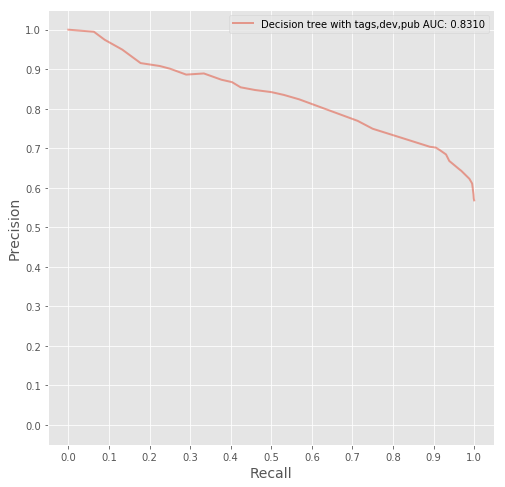

In [81]:
col_list = feature_sets.copy()

parameters_dt = {'max_features':['auto', 'sqrt', 'log2',None],'splitter':['best'], 'criterion':['gini', 'entropy'], 'max_depth':[2,3,4,5,6,7,8,9,10], 'min_samples_split':[.005,.01,.015,.02,.025,.03,.035,.04,.045,.05], 'min_samples_leaf':[.005,.01,.015,.02,.025,.03,.035,.04,.045,.05], 'min_impurity_decrease':list(np.arange(0,0.11,.01)) }
accuracy_dt = randomised_search_cv(DecisionTreeClassifier,parameters_dt,X_train,col_list,y_train,num_iter=500)
modelbuilder(DecisionTreeClassifier,accuracy_dt[0],X_train,X_test,col_list,y_train,y_test,test_processed,"Decision tree with tags,dev,pub")


In [87]:
import warnings
warnings.filterwarnings('ignore')

Precision on train 0.7505123650771963
Recall on train 0.7863994273443092
F1 score on train 0.7680369127516778
Precision on test: 0.7299630086313194
Recall on test: 0.7938317130405632
F1 Score on test:  0.7605588565922595
[[1390  876]
 [ 615 2368]]


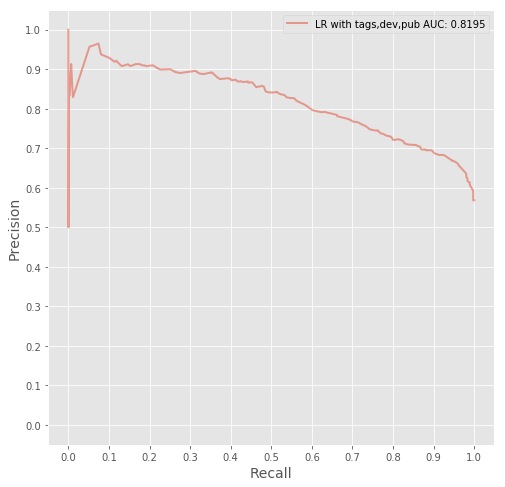

In [89]:
col_list = feature_sets.copy()

# parameters_lr = {'penalty':['l1','l2'],
#                  'max_iter': [250,300,350,400,450,500]}

# accuracy_lr = randomised_search_cv(LogisticRegression,parameters_lr,X_train,col_list,y_train,num_iter=500)
modelbuilder(LogisticRegression,{},X_train,X_test,col_list,y_train,y_test,test_processed,"LR with tags,dev,pub")


0iterations ran
Precision on train 0.6852807923295754
Recall on train 0.9311381531853973
F1 score on train 0.7895120174799709
Precision on test: 0.6766771615403245
Recall on test: 0.9366409654710024
F1 Score on test:  0.7857142857142858
[[ 931 1335]
 [ 189 2794]]


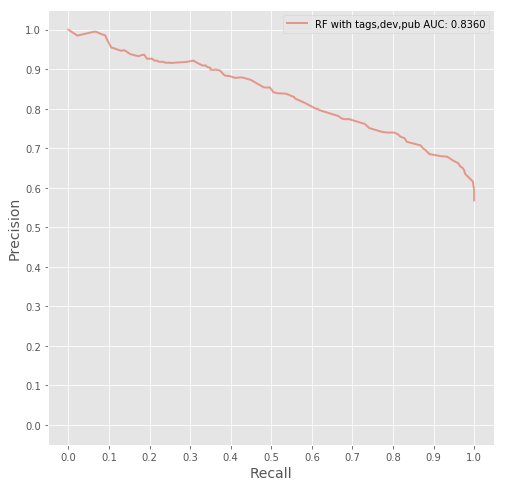

In [99]:
col_list = feature_sets.copy()

parameters_rf = {'max_features':['sqrt', 'log2',None], 'criterion':['gini', 'entropy'], 'max_depth':[3,4,5,6,7], 'min_impurity_decrease':list(np.arange(0,0.11,.01)) }
accuracy_rf = randomised_search_cv(RandomForestClassifier,parameters_rf,X_train,col_list,y_train,num_iter=50)
modelbuilder(RandomForestClassifier,accuracy_rf[0],X_train,X_test,col_list,y_train,y_test,test_processed,"RF with tags,dev,pub")


In [ ]:
col_list = feature_sets.copy()

parameters_cb = {'depth':[2, 3, 4],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'l2_leaf_reg':np.logspace(-20, -19, 3)}

accuracy_cb = randomised_search_cv(CatBoostClassifier,parameters_cb,X_train,col_list,y_train,num_iter=500)
modelbuilder(CatBoostClassifier,accuracy_cb[0],X_train,X_test,col_list,y_train,y_test,test_processed,"Catboost with tags,dev,pub")


Learning rate set to 0.030026
0:	learn: 0.7775438	total: 31.2ms	remaining: 31.2s
1:	learn: 0.7871540	total: 66.7ms	remaining: 33.3s
2:	learn: 0.7871540	total: 92.8ms	remaining: 30.8s
3:	learn: 0.7871540	total: 115ms	remaining: 28.6s
4:	learn: 0.7871540	total: 135ms	remaining: 26.8s
5:	learn: 0.7871540	total: 158ms	remaining: 26.2s
6:	learn: 0.7871540	total: 178ms	remaining: 25.2s
7:	learn: 0.7871540	total: 200ms	remaining: 24.8s
8:	learn: 0.7871540	total: 227ms	remaining: 25s
9:	learn: 0.7871540	total: 251ms	remaining: 24.8s
10:	learn: 0.7871540	total: 288ms	remaining: 25.9s
11:	learn: 0.7871540	total: 312ms	remaining: 25.7s
12:	learn: 0.7871540	total: 338ms	remaining: 25.6s
13:	learn: 0.7871540	total: 363ms	remaining: 25.6s
14:	learn: 0.7871540	total: 386ms	remaining: 25.4s
15:	learn: 0.7871540	total: 410ms	remaining: 25.2s
16:	learn: 0.7871540	total: 441ms	remaining: 25.5s
17:	learn: 0.7871540	total: 466ms	remaining: 25.4s
18:	learn: 0.7871540	total: 490ms	remaining: 25.3s
19:	learn:

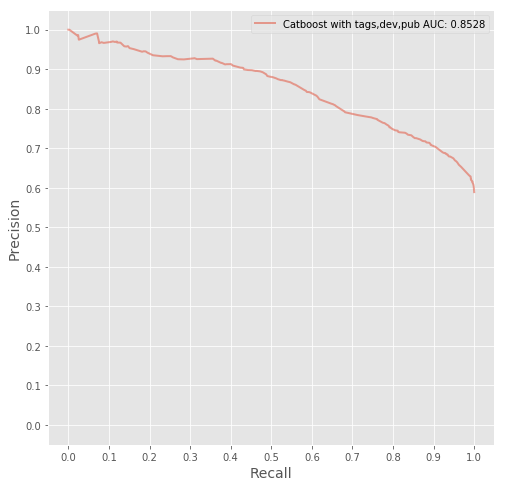

In [104]:
modelbuilder(CatBoostClassifier,{'eval_metric':'F1'},X_train,X_test,col_list,y_train,y_test,test_processed,"Catboost with tags,dev,pub")
